<a href="https://colab.research.google.com/github/atulpatil2228/Pw_ML_learning/blob/main/6_Simple_linear_regression_python_implementation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("height-weight.csv")


Saving height-weight.csv to height-weight (1).csv


In [5]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

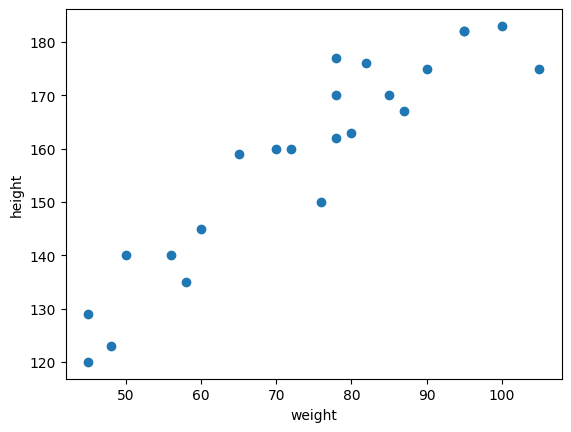

In [6]:
plt.scatter(df.Weight,df.Height)
plt.xlabel("weight")
plt.ylabel("height")

In [7]:
## divide the data into X and y
X = df[['Weight']]## independent feature
y = df['Height']## dependent feature

In [8]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [9]:
y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [10]:
## train test split
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [12]:
X_train

,Weight
10,82
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78


In [13]:
X_test

,Weight
20,45
17,65
3,60
13,100
19,87
16,50


In [14]:
y_train

,Height
10,176
4,160
2,123
18,150
6,163
7,175
1,135
14,170
0,120
15,177


In [15]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((17, 1), (17,), (6, 1), (6,))

In [16]:
df.shape

(23, 2)

In [17]:
## Scaling >>standardisation for data set >>fit_transform>>train>> transform>>testdata

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
scaler

StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)## for train data we use fit_transform

In [22]:
X_test = scaler.transform(X_test)## for test data use only transfore>>unkmnown data
## always perform scalling after train test split
## target variable should not be scaled (y) and avoid categorical feature

In [23]:
X_train

array([[ 0.37554243],
       [-0.36825034],
       [-1.73187043],
       [ 0.00364604],
       [ 0.25157697],
       [ 0.87140428],
       [-1.11204312],
       [ 0.56149062],
       [-1.91781863],
       [ 0.12761151],
       [-0.24428488],
       [-1.23600858],
       [ 0.12761151],
       [ 1.18131794],
       [ 1.80114525],
       [ 1.18131794],
       [ 0.12761151]])

In [24]:
X_test

array([[-1.91781863],
       [-0.678164  ],
       [-0.98807766],
       [ 1.49123159],
       [ 0.68545609],
       [-1.60790497]])

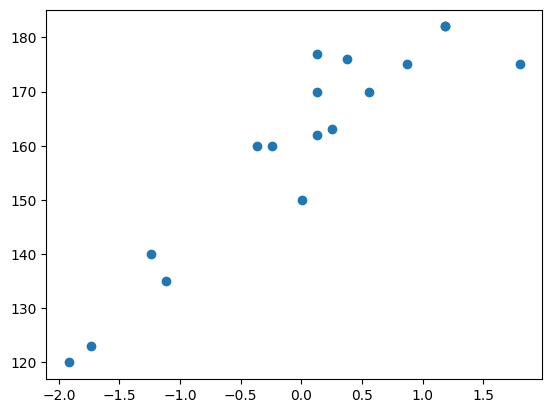

In [25]:
## Scaling is optional >> it doesnot change the distribution of data
plt.scatter(X_train,y_train)

In [26]:
## model traning
from sklearn.linear_model import LinearRegression

## Linear regression parameters
## fit_intercept>> intercept of the model>>the best fit line will have intercept
##copyX>>copy the orignal X_train and then build the model >> dont modify the orignal data
## n.jobs >>processor you want to use
## positve >>  if u want all coeff to positive

## after building the model ,you have attributes of the model
## coef
## intercept

In [27]:
regressor  = LinearRegression()

In [28]:
regressor

LinearRegression()

In [29]:
## Traning of model
regressor.fit(X_train,y_train)

LinearRegression()

In [30]:
print("The slope or coef of model is",regressor.coef_)
print("The intercept of the model is",regressor.intercept_)

The slope or coef of model is [17.7307072]
The intercept of the model is 160.0


In [ ]:
## This was prediction on train data
## predicted height  output = intercept + coef(weight)
## y_pred_train = 160.0+17.74*(X_train)


## Prediction on test data
## predicted height  output = intercept + coef(weight)
## y_pred_train = 160.0+17.74*(X_test)

In [31]:
## prediction of train data
regressor.predict(X_train)

array([166.65863288, 153.47066096, 129.29271243, 160.06464692,
       164.46063756, 175.45061417, 140.28268904, 169.95562586,
       125.99571945, 162.26264224, 155.66865628, 138.08469371,
       162.26264224, 180.94560247, 191.93557907, 180.94560247,
       162.26264224])

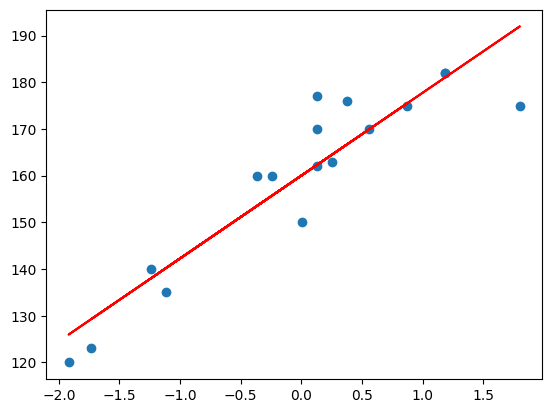

In [32]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

In [33]:
y_pred_test = regressor.predict(X_test)

In [35]:
y_pred_test ,y_test

(array([125.99571945, 147.97567266, 142.48068436, 186.44059077,
        172.15362118, 131.49070775]),
 20    129
 17    159
 3     145
 13    183
 19    167
 16    140
 Name: Height, dtype: int64)

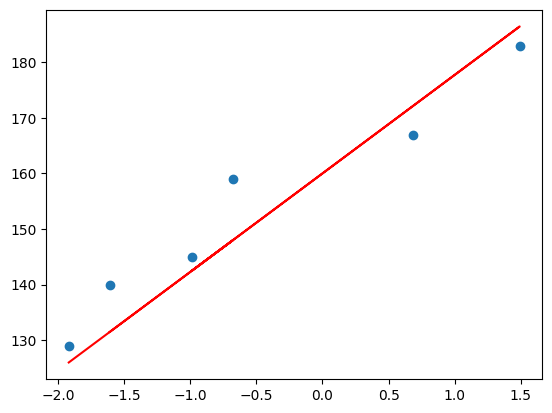

In [36]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred_test,'r')

In [37]:
## Performace matrix

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [39]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)

print(mse,mae,rmse)

41.285662830455514 5.608571289304838 6.425392037102134


In [40]:
## Rquare >>1-ssr/sst

In [41]:
from sklearn.metrics import r2_score

In [44]:
score = r2_score(y_test,y_pred_test)

In [43]:
#adjusted r square
#R2 = 1 – [(1-R2)*(n-1)/(n-k-1)] #n is no of obs, k is no predictor varaiables

In [45]:
1-(1-score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1] -1)
#adjusted r square will be always lesser than rsquare

0.8401295217820757

In [47]:
## to get the no of col
X_test.shape[1]

1

In [48]:
height_scaled = scaler.transform([[70]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [49]:
height_scaled

array([[-0.36825034]])

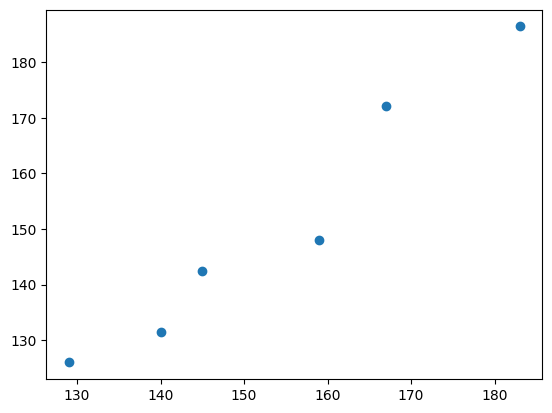

In [50]:
## assumption
## X and y should have linear relatioship
## observation sshould have no relation
## erroe  should have constant varaince
## error should be normally distributed
plt.scatter(y_test ,y_pred_test)

In [51]:
## residual/erro
error = y_test-y_pred_test

In [52]:
error

,Height
20,3.004281
17,11.024327
3,2.519316
13,-3.440591
19,-5.153621
16,8.509292


/tmp/ipython-input-464779861.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)


<Axes: xlabel='Height', ylabel='Density'>

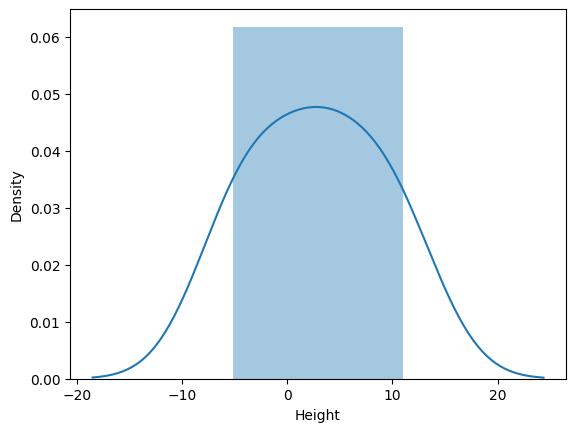

In [53]:
import seaborn as sns
sns.distplot(error)

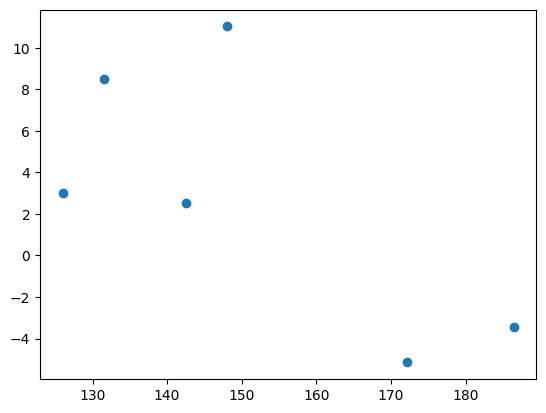

In [54]:
## erroe  should have constant varaince
plt.scatter(y_pred_test,error)